In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [16]:
d = nc.Dataset(filepath)

In [17]:
[print(i) for i in d.variables.keys()]

BOUT_VERSION
Bxy
G1
G2
G3
J
MXG
MXSUB
MYG
MYPE
MYSUB
MZ
MZG
MZSUB
NXPE
NYPE
NZPE
PE_XIND
PE_YIND
R
Z
ZMAX
ZMIN
dx
dy
dz
g11
g12
g13
g22
g23
g33
g_11
g_12
g_13
g_22
g_23
g_33
ixseps1
ixseps2
jyseps1_1
jyseps1_2
jyseps2_1
jyseps2_2
nx
ny
ny_inner
nz
out_0
out_1
out_10
out_11
out_12
out_13
out_14
out_15
out_16
out_17
out_18
out_19
out_2
out_20
out_21
out_22
out_23
out_24
out_25
out_26
out_27
out_28
out_29
out_3
out_30
out_31
out_32
out_33
out_34
out_35
out_36
out_37
out_38
out_39
out_4
out_40
out_41
out_42
out_43
out_5
out_6
out_7
out_8
out_9
zperiod


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
d.close()

In [8]:
filepath = r"C:\Users\mikek\OneDrive\Project\Coupling\BOUT.mesh_0.0.nc"
gridpath = r"C:\Users\mikek\OneDrive\Project\Coupling\guards_grid_0.nc"

bd = xbout.open_boutdataset(
    filepath, 
    # inputfilepath='BOUT.inp', 
    geometry="toroidal",
    gridfilepath=gridpath,
    keep_yboundaries=False, 
    is_mms_dump=True,
    info = False
    )

C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:1140: UserWarning: Will drop all variables containing the dimensions 'x2' because they are not recognised
  warn(


TEST
Data variables:
    Bxy                      (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G1                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G2                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G3                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    J                        (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    R                        (x, theta, zeta) float64 dask.array<chunksize=(40, 40, 64), meta=np.ndarray>
    Z                        (x, theta, zeta) float64 dask.array<chunksize=(40, 40, 64), meta=np.ndarray>
    dx                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>

In [6]:
ds = bd
bd.coords

Coordinates:
    dx                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    Rxy                      (x, theta) float64 2.108 2.113 ... 0.9462 0.912
    Zxy                      (x, theta) float64 0.01512 0.04499 ... -0.1092
    poloidal_distance        (x, theta) float64 0.01513 0.0454 ... 8.418 8.637
    poloidal_distance_ylow   (x, theta) float64 0.0 0.03027 ... 8.309 8.528
    total_poloidal_distance  (x) float64 1.211 1.897 2.392 ... 8.547 8.648 8.746
    zShift                   (x, theta) float64 0.3501 1.05 ... 23.84 25.11
    zShift_CELL_YLOW         (x, theta) float64 0.0 0.7 1.399 ... 23.22 24.47
    Rxy_lower_left_corners   (x, theta) float64 2.2 2.201 ... 0.9833 0.9326
    Rxy_lower_right_corners  (x, theta) float64 2.047 2.05 ... 0.9685 0.9172
   

In [7]:
if ("R" not in ds) and ("Z" not in ds):
    print("yes")

In [9]:
ds

<xarray.Dataset>
Dimensions:                  (x: 40, theta: 40, zeta: 64)
Coordinates: (12/22)
    dx                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dy                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    dz                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    Rxy                      (x, theta) float64 2.108 2.113 ... 0.9462 0.912
    Zxy                      (x, theta) float64 0.01512 0.04499 ... -0.1092
    poloidal_distance        (x, theta) float64 0.01513 0.0454 ... 8.418 8.637
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 0.01564 0.0309 ... 6.522e-09
    Zxy_upper_right_corners  (x, theta) float64 0.03964 0.0783 ... 6.227e-09
    psi_poloidal             (x, theta) float64 0.01452 0.01452 ... 0.8424
  * x                        (x) int32 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
  * theta                    (theta) float64 0.07854 0.2356 ... 6.048 6.205
  * zeta                     (zeta) float64 0.0 0.09817 0.1963 ... 6.087 6.185
Data variables: (12/67)
    Bxy                      (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G1                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G2                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    G3                       (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    J                        (x, theta) float64 dask.array<chunksize=(40, 40), meta=np.ndarray>
    R                        (x, theta, zeta) float64 dask.array<chunksize=(40, 40, 64), meta=np.ndarray>
    ...                       ...
    out_8                    (x, theta, zeta) float64 dask.array<chunksize=(40, 40, 64), meta=np.ndarray>
    out_9                    (x, theta, zeta) float64 dask.array<chunksize=(40, 40, 64), meta=np.ndarray>
    psixy                    (x, theta) float64 0.01452 0.01452 ... 0.8424
    Bpxy                     (x, theta) float64 0.07161 0.07145 ... 1.443 1.497
    Brxy                     (x, theta) float64 0.005618 0.01668 ... -0.1174
    Bzxy                     (x, theta) float64 0.07139 0.06947 ... 1.403 1.492
Attributes:
    metadata:  {'BOUT_VERSION': 5.2, 'MXG': 2, 'MXSUB': 36, 'MYG': 1, 'MYSUB'...
    options:   None
    regions:   {'core': <xbout.region.Region>\n\tname\tcore\n\txinner_ind\t0\...
    geometry:  toroidal

KeyError: 'R'

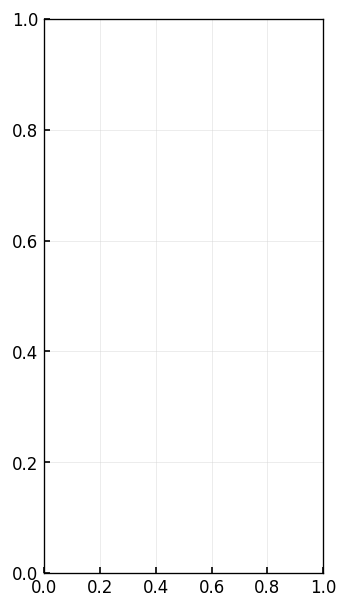

In [3]:
bd["Bxy"].bout.polygon()

In [ ]:

#print(bd.coords)
print(bd.keys())
#for key in bd.keys():
#    print(key)
#print(np.shape(bd["R"]))
#print(bd["R"].values)
#bd = bd.set_coords(("R", "Z"))
print(list(bd.coords))
print(bd["Bxy"].coords)
bd["Bxy"].bout.polygon()
bd["out_33"].bout.polygon()
